In [3]:
import pandas as pd

In [102]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime

## Plan

- Look at some stock price series
- devise a model for stock price series
- describe a call option
- price a call option

## Look at some stock prices

We import data from Yahoo finance: two examples are IBM and Apple

In [103]:
aapl = data.DataReader('AAPL', 'yahoo', '2000-01-01')
print(aapl.head())

                  Open        High         Low       Close     Volume  \
Date                                                                    
2000-01-03  104.874997  112.499998  101.687501  111.937502  133949200   
2000-01-04  108.250001  110.625002  101.187503  102.500003  128094400   
2000-01-05  103.749998  110.562497  103.000001  103.999997  194580400   
2000-01-06  106.124999  106.999999   94.999998   94.999998  191993200   
2000-01-07   96.499999  101.000002   95.500003   99.500001  115183600   

            Adj Close  
Date                   
2000-01-03   3.625643  
2000-01-04   3.319964  
2000-01-05   3.368548  
2000-01-06   3.077039  
2000-01-07   3.222794  


$\Rightarrow$ We get various different prices

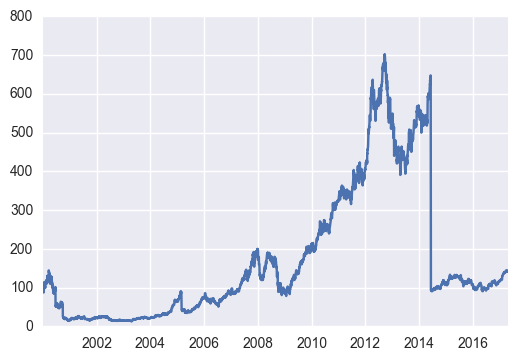

In [104]:
plt.plot(aapl.Close)

$\Longrightarrow$ There was a stock split 7:1 on 06/09/2014.
As we do not want to take care of things like that, we use the Adjusted close price!

Date
2000-01-03    3.625643
2000-01-04    3.319964
2000-01-05    3.368548
2000-01-06    3.077039
2000-01-07    3.222794
Name: Adj Close, dtype: float64


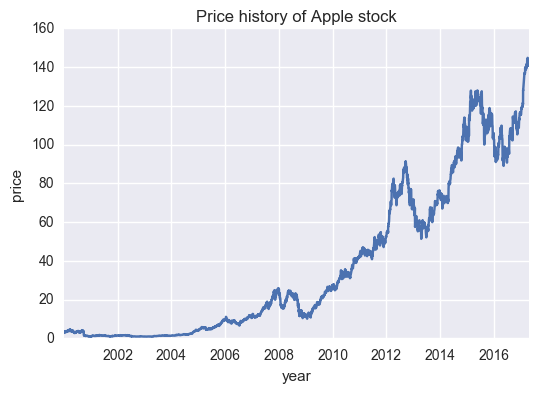

In [105]:
print(aapl['Adj Close'].head())
%matplotlib inline
plt.plot(aapl['Adj Close'])
plt.ylabel('price')
plt.xlabel('year')
plt.title('Price history of Apple stock')
plt.show()

Date
2000-01-03    87.761136
2000-01-04    84.782175
2000-01-05    87.761136
2000-01-06    86.248013
2000-01-07    85.869732
Name: Adj Close, dtype: float64


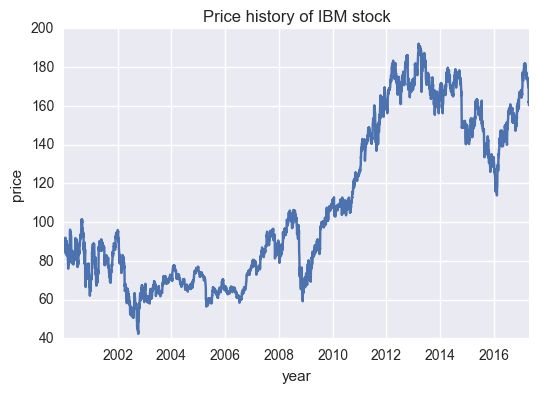

In [106]:
ibm = data.DataReader('IBM', 'yahoo', '2000-1-1')
print(ibm['Adj Close'].head())
%matplotlib inline
plt.plot(ibm['Adj Close'])
plt.ylabel('price')
plt.xlabel('year')
plt.title('Price history of IBM stock')


For the apple chart one can see, that price increments seem to correlate with the price: thus we plot logarithmic prices:

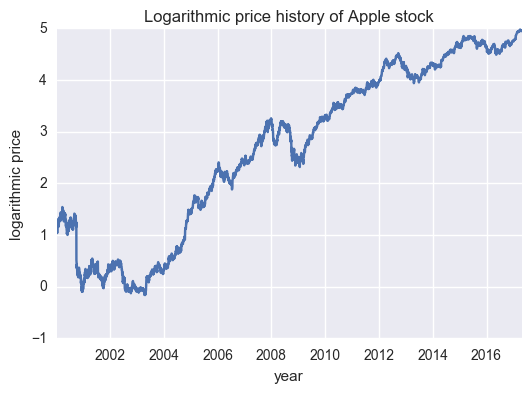

In [107]:
Log_Data = plt.figure()
%matplotlib inline
plt.plot(np.log(aapl['Adj Close']))
plt.ylabel('logarithmic price')
plt.xlabel('year')
plt.title('Logarithmic price history of Apple stock')

Now the roughness of the chart looks more even

## Find a model

Idea: 
- Small changes appear often, large changes rarly:
- changes are proportional to the underlying stock price

 $\Rightarrow$ use an exponential Gaussian distribution for increments:
 $$S_{n+1} = S_n e^{\sigma X+ \mu} $$
 where $X \sim N(0,1)$, $\sigma$ denotes the variance and $\mu$ the mean growth rate.

In [218]:
S0 = 1
sigma = 0.01
mu = 0
r = np.random.randn((1000))
S =  S0 * np.cumprod(np.exp(sigma *r))

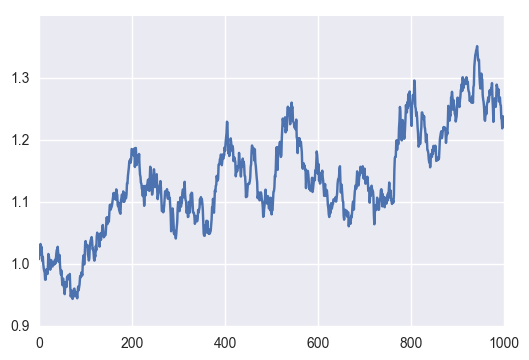

In [219]:
%matplotlib inline
plt.plot(S)

## Call option

Call option on a stock $S$ with strike price $K$ and expiry $T$: 

The buyer of the call option has the right, but not the obligation, to buy $1$ stock $S$  (the underlying) from the seller of the option at a certain time (the expiration date $T$) for a certain price (the strike price $K$).

What is a fair price for this option?
If the stock trades at a price $S$ at time $T$, then the payoff is: 

Payoff: $C_T =\max(0, S-K)\,.$

If the interest rate is $r$, then for this Payoff, one would pay today (time $t = 0$)
$$C_0 = e^{- r T} \max(0, S-K)\,.$$

Problem: we do not know $S_T$ at time $0$.

Solution: we take the expectation of $S$. This yields

$$C_{0, S} = e^{- r T} \mathbb{E}\left[ \max(0, S-K)\right]\,.$$

In [220]:
S0 = 1.5                    # start price
K = 1.0                     # strike price
mu = 0                      # average growth
sigma = 0.2/np.sqrt(252)    # volatility
N = 10000                   # runs
M = 252*4                   # length of each run (252 business days per year times 4 years)

In [221]:
def call_price(S, K):
    return max(0.0, S-K)

In [222]:
def MC_call_price(S0, K, mu, sigma, N, M):
    CSum = 0
    SSum = 0
    for n in range(N):
        r = np.random.randn((M))
        S =  S0 * np.cumprod(np.exp(sigma *r))
        SSum += S
        CSum += call_price(S[M-1], K)
    return CSum/N


In [224]:
S0 = np.linspace(0.0, 2.0,21)
C = []
for k in range(21):
    C.append(MC_call_price(k*2/20, K, mu, sigma, N, M))

### Optionprices:


In [225]:
C

[0.0,
 0.0,
 0.0,
 0.00012432182345337487,
 0.0015563759427504684,
 0.0086961623477458862,
 0.02339358637244978,
 0.049285890762920379,
 0.090564800546115265,
 0.14690533425750668,
 0.20989159189593551,
 0.28177916364296218,
 0.36662837205491539,
 0.46522641562956424,
 0.5536785445435819,
 0.64434224208763602,
 0.75026046696291737,
 0.86175567283105525,
 0.97052587134794155,
 1.0721011428030698,
 1.1631407222659746]

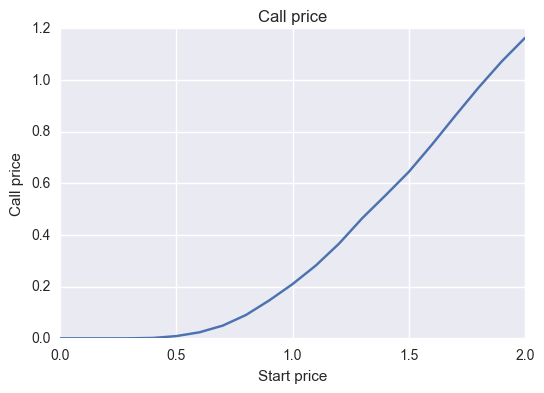

In [226]:
plt.plot(S0, C)
plt.ylabel('Call price')
plt.xlabel('Start price')
plt.title('Call price')
plt.show()

This curve can also be calculated theoretically. Using stochastic calculus, one can deduce the famous Black-Scholes equation, to calculate this curve. We will not go into detail ...

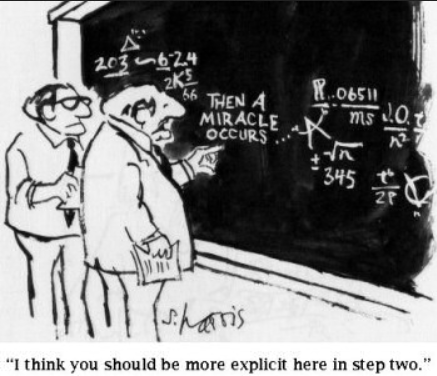

In [118]:
from IPython.display import Image
Image("Picture_Then_Miracle_Occurs.PNG")

... but will just state the final result!

## Black Scholes formula:

$${\displaystyle d_{1}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+(r-q+{\frac {1}{2}}\sigma ^{2})(T-t)\right]}$$

$${\displaystyle d_{2}=d_{1}-\sigma {\sqrt {T-t}}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+(r-q-{\frac {1}{2}}\sigma ^{2})(T-t)\right]}$$

Black-Scholes Formula for the call price:

$${\displaystyle C(S_{t},t)=e^{-r(T-t)}[S_tN(d_{1})-KN(d_{2})]\,}$$

$\Delta$ describes the change in the price of the option if the stock price changes by $1$.

Black Scholes formula for the Delta:

$$ \Delta(C, t) = e^{-r(T-t)} N(d_1)$$

In [239]:
d_1 = lambda σ, T, t, S, K: 1. / σ / np.sqrt(T - t) * (np.log(S / K) + 0.5 * (σ ** 2) * (T-t))
d_2 = lambda σ, T, t, S, K: 1. / σ / np.sqrt(T - t) * (np.log(S / K) - 0.5 * (σ ** 2) * (T-t))

call = lambda σ, T, t, S, K: S * sp.stats.norm.cdf( d_1(σ, T, t, S, K) ) - K * sp.stats.norm.cdf( d_2(σ, T, t, S, K) )
Delta = lambda σ, T, t, S, K: sp.stats.norm.cdf( d_1(σ, T, t, S, K) )

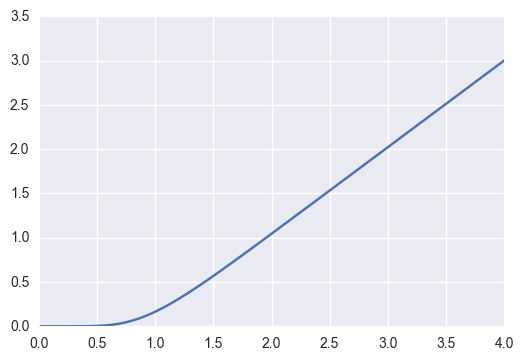

In [242]:
plt.plot(np.linspace(sigma, 4., 100), call(1., 1., .9, np.linspace(0.1, 4., 100), 1.))

plt.plot(d_1(1., 1., 0., np.linspace(0.1, 2.9, 10), 1))

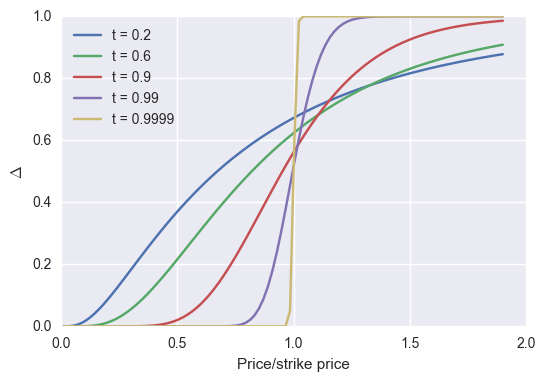

In [260]:
#plt.plot(np.linspace(sigma, 4., 100), Delta(1., 1.,  .9, np.linspace(0.1,   4., 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.2, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.6, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.9, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.99, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.9999, np.linspace(0.01, 1.9, 100), 1.))
plt.xlabel("Price/strike price")
plt.ylabel("$\Delta$")
plt.legend(['t = 0.2','t = 0.6', 't = 0.9', 't = 0.99', 't = 0.9999'], loc= )

For small prices we do not need to own shares, to hedge the option. For high prices we need exactly one share. The interesting area is around the strike price.

Simulate a portfolio consisting of 1 call option and $-\Delta$ Shares:
$$P = C - \Delta S$$
In approximation, the portfolio value should be constant!

In [262]:
def Simulate_Price_Series(S0, sigma, N, M):
    for n in range(N):
        r = np.random.randn((M))
        S =  S0 * np.cumprod(np.exp(sigma * r))
    return S

In [279]:
plt.plot(1+np.cumsum(np.diff(S) *Delta(sigma, 4, 0, S, K)[1, M-1]))
plt.plot(S)

IndexError: too many indices for array

In [293]:
len(Delta(sigma, 4, 0, S, K)[[1:999]])


SyntaxError: invalid syntax (<ipython-input-293-33745b330950>, line 1)

In [ ]:
def Calculate_Portfolio(S0, K, mu, sigma, N, M):
    S = Simulate_Price_Series(S0, sigma, N, M)
    StockDelta = Delta(sigma, 4, 0, S, K) )
    vol = vol0 * np.cumprod(np.exp(sigma*r2)
    S =  S0 * np.cumprod(np.exp(vol * r))
    SSum += S
    CSum += call_price(S[M-1], K)

## Challenges

- 1) the price depends on the calibration of several parameters, $\sigma$, $\mu$
- 2) the price depends on the validity of the model

Both problems need attention:
1) $\sigma$ and $\mu$ may change over time. Hence changes of volatility should adapted in the price
$\Longrightarrow$ new more complex models describing stochastic volatility are introduced 
- Heston model, 
- Ball-Roma model, 
- SABR-model and many more

2) normally distributed increments are not realistic. Real distributions are
- Heavy tails:
- Gain/Loss asymmetry 
- Aggregational Gaussianity
- Intermittency (parameter changes over time)
- Volatility clustering
- Leverage effect
- Volume/volatility correlation:
- Slow decay of autocorrelation in absolute returns:
- Asymmetry in time scales

(see for example: Rama Cont: Empirical properties of asset returns: stylized facts and statistical issues, Journal of quantitative finance, Volume 1 (2001) 223–236)


The option price depends on the model, on the calibration.

## Alternative model: Local volatility model

The closest alternative to the Black-Scholes model are local volatility models.

In [235]:
def MC_call_price_Loc_Vol(S0, K, mu, sigma, N, M):
    CSum = 0
    SSum = 0
    for n in range(N):
        r = np.random.randn((M))
        r2 = np.random.randn((M))
        vol = vol0 * np.cumprod(np.exp(sigma*r2)
        S =  S0 * np.cumprod(np.exp(vol * r))
        SSum += S
        CSum += call_price(S[M-1], K)
    return CSum/N

In [236]:
S0 = np.linspace(0.0, 2.0,21)
CLoc = []
for k in range(21):
    CLoc.append(MC_call_price_Loc_Vol(k*2/20, K, mu, 0.1*sigma, N, M))
  

UnboundLocalError: local variable 'S' referenced before assignment

In [229]:
CLoc

[0.0,
 193878417.6923587,
 374098051.25841838,
 727640083.74505699,
 675646484.50066948,
 1134504644.2167087,
 1137660239.9456077,
 1373675571.9229693,
 1763735119.3492641,
 1630742533.6742754,
 2314715906.3182936,
 2259151217.0787606,
 2363880188.7982392,
 2498293978.6368904,
 2990109038.4270267,
 2786520003.0050435,
 3096873600.076241,
 3602865471.2213421,
 3810437858.9222054,
 3710039350.3346295,
 4456204623.7149153]

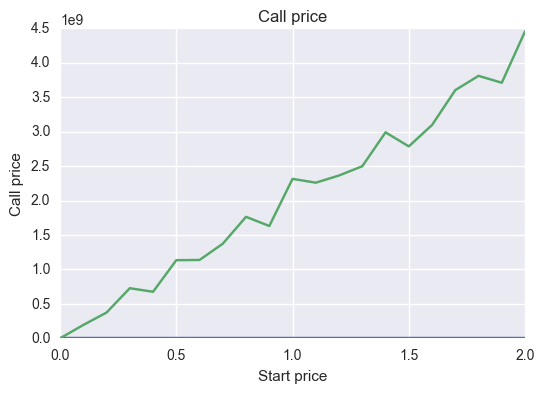

In [230]:
plt.plot(S0, C)
plt.plot(S0, CLoc)
plt.ylabel('Call price')
plt.xlabel('Start price')
plt.title('Call price')
plt.show()

## Proposed solution

Find a way to price an option without the assumption of a market model, without the need to calibrate and recalibrate the model.

In [253]:
def iterate_series(n=1000, S0 = 1):
    while True:
        r = np.random.randn((n))
        S = np.cumsum(r) + S0
        yield S, r

In [254]:
for (s, r) in iterate_series():
    t, t_0 = 0, 0
    for t in np.linspace(0, len(s)-1, 100):
        r = s[int(t)] / s[int(t_0)]
        t_0 = t
    break

In [255]:
state = (stock_val, besitz)

NameError: name 'stock_val' is not defined

In [93]:
state = rel_stock_price, tau

## Q-learning

- Initialize $V(s)$ arbitrarily
- Repeat for each episode
- Initialize s
- Repeat (for each step of episode)
- -    $\alpha \leftarrow$ action given by $\pi$ for $s$
- - Take action a, observe reward r, and next state s'
- - $V(s) \leftarrow V(s) + \alpha [r = \gamma V(s') - V(s)]$ 
- - $s \leftarrow s'$
- until $s$ is terminal